In [59]:
'''Main'''
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip, datetime
from os import listdir, walk
from os.path import isfile, join

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import Grid

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error
from keras.utils import to_categorical
from sklearn.metrics import adjusted_rand_score
import random

'''Algos'''
from kshape.core import kshape, zscore
import tslearn
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import KShape, TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
import hdbscan

'''TensorFlow and Keras'''
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import LeakyReLU, Reshape, UpSampling2D, Conv2DTranspose
from keras.layers import BatchNormalization, Input, Lambda
from keras.layers import Embedding, Flatten, dot
from keras import regularizers
from keras.losses import mse, binary_crossentropy
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import Adam, RMSprop
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
# Load the datasets
current_path = os.getcwd()
file = '\\datasets\\ucr_time_series_data\\'
data_train = np.loadtxt(current_path+file+
                        "ECGFiveDays/ECGFiveDays_TRAIN", 
                        delimiter=",")
X_train = to_time_series_dataset(data_train[:, 1:])
y_train = data_train[:, 0].astype(np.int)

data_test = np.loadtxt(current_path+file+
                       "ECGFiveDays/ECGFiveDays_TEST", 
                       delimiter=",")
X_test = to_time_series_dataset(data_test[:, 1:])
y_test = data_test[:, 0].astype(np.int)

In [7]:
# Basic summary statistics
print("Number of time series:", len(data_train))
print("Number of unique classes:", len(np.unique(data_train[:,0])))
print("Time series length:", len(data_train[0,1:]))

Number of time series: 23
Number of unique classes: 2
Time series length: 136


In [8]:
# Number of examples in each class in the training set
print("Number of time series in class 1.0:", 
      len(data_train[data_train[:,0]==1.0]))
print("Number of time series in class 2.0:", 
      len(data_train[data_train[:,0]==2.0]))

Number of time series in class 1.0: 14
Number of time series in class 2.0: 9


Plot  0  Class  1.0


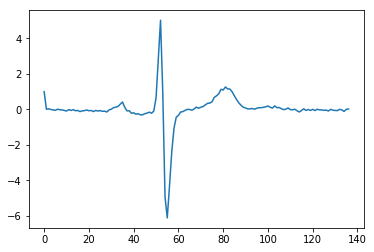

Plot  1  Class  1.0


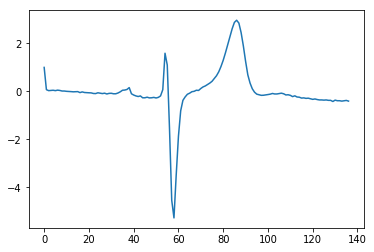

Plot  4  Class  1.0


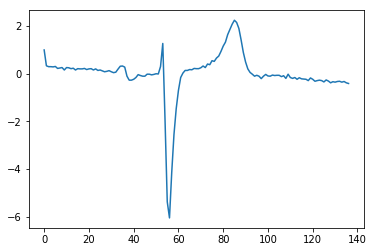

Plot  7  Class  1.0


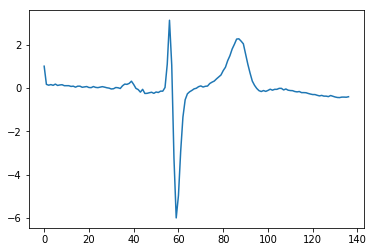

Plot  9  Class  1.0


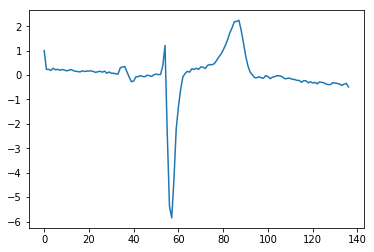

In [15]:
# Examples of Class 1.0
for i in range(0,10):
    if data_train[i,0]==1.0:
        print("Plot ",i," Class ",data_train[i,0])
        plt.plot(data_train[i])
        plt.show()

Plot  2  Class  2.0


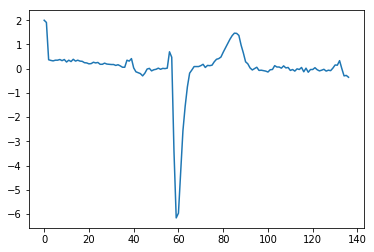

Plot  3  Class  2.0


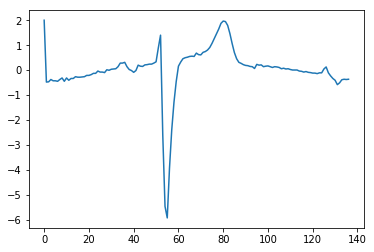

Plot  5  Class  2.0


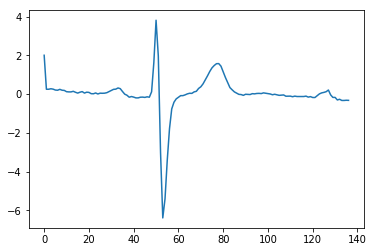

Plot  6  Class  2.0


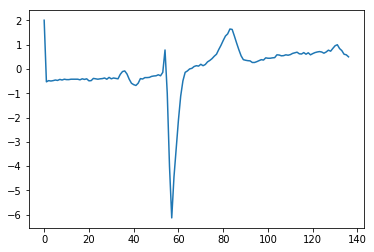

Plot  8  Class  2.0


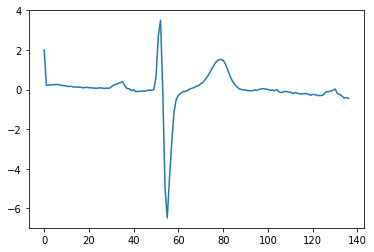

In [16]:
# Examples of Class 2.0
for i in range(0,10):
    if data_train[i,0]==2.0:
        print("Plot ",i," Class ",data_train[i,0])
        plt.plot(data_train[i])
        plt.show()

In [11]:
# Prepare the data - Scale
X_train = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X_train)
X_test = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X_test)

In [ ]:
# k-Shape Algorithm

In [42]:
# Train using k-Shape
ks = KShape(n_clusters=2, max_iter=100, n_init=100,verbose=0)
ks.fit(X_train)

KShape(max_iter=100, n_clusters=2, n_init=100, random_state=None, tol=1e-06,
    verbose=0)

In [43]:
# Make predictions on train set and calculate adjusted Rand index
preds = ks.predict(X_train)
ars = adjusted_rand_score(data_train[:,0],preds)
print("Adjusted Rand Index:", ars)

Adjusted Rand Index: 0.668041237113402


In [44]:
# Make predictions on test set and calculate adjusted Rand index
preds_test = ks.predict(X_test)
ars = adjusted_rand_score(data_test[:,0],preds_test)
print("Adjusted Rand Index on Test Set:", ars)

Adjusted Rand Index on Test Set: 0.0006332050676187496


In [32]:
# ECG 5000

In [45]:
# Load the datasets
current_path = os.getcwd()
file = '\\datasets\\ucr_time_series_data\\'
data_train = np.loadtxt(current_path+file+
                        "ECG5000/ECG5000_TRAIN", 
                        delimiter=",")

data_test = np.loadtxt(current_path+file+
                       "ECG5000/ECG5000_TEST", 
                       delimiter=",")

data_joined = np.concatenate((data_train,data_test),axis=0)
data_train, data_test = train_test_split(data_joined, 
                                    test_size=0.20, random_state=2019)

X_train = to_time_series_dataset(data_train[:, 1:])
y_train = data_train[:, 0].astype(np.int)
X_test = to_time_series_dataset(data_test[:, 1:])
y_test = data_test[:, 0].astype(np.int)

In [46]:
# Summary statistics
print("Number of time series:", len(data_train))
print("Number of unique classes:", len(np.unique(data_train[:,0])))
print("Time series length:", len(data_train[0,1:]))

Number of time series: 4000
Number of unique classes: 5
Time series length: 140


In [47]:
# Calculate number of readings per class
print("Number of time series in class 1.0:", 
      len(data_train[data_train[:,0]==1.0]))
print("Number of time series in class 2.0:", 
      len(data_train[data_train[:,0]==2.0]))
print("Number of time series in class 3.0:", 
      len(data_train[data_train[:,0]==3.0]))
print("Number of time series in class 4.0:", 
      len(data_train[data_train[:,0]==4.0]))
print("Number of time series in class 5.0:", 
      len(data_train[data_train[:,0]==5.0]))

Number of time series in class 1.0: 2327
Number of time series in class 2.0: 1423
Number of time series in class 3.0: 75
Number of time series in class 4.0: 156
Number of time series in class 5.0: 19


 Class  1.0  Count  2327


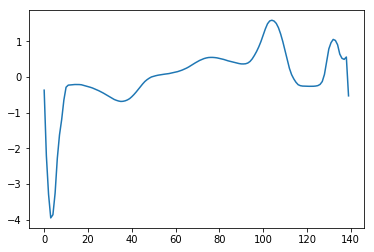

 Class  2.0  Count  1423


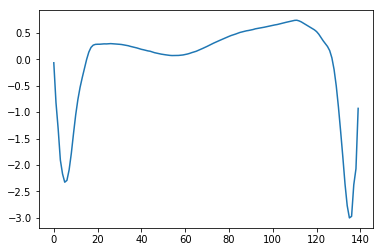

 Class  3.0  Count  75


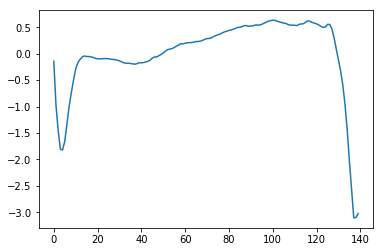

 Class  4.0  Count  156


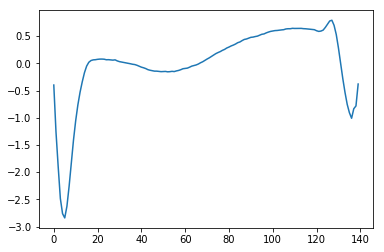

 Class  5.0  Count  19


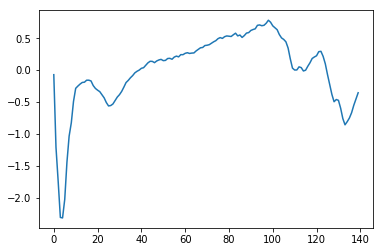

In [48]:
# Display readings from each class
for j in np.unique(data_train[:,0]):
    dataPlot = data_train[data_train[:,0]==j]
    cnt = len(dataPlot)
    dataPlot = dataPlot[:,1:].mean(axis=0)
    print(" Class ",j," Count ",cnt)
    plt.plot(dataPlot)
    plt.show()

In [49]:
# Prepare data - Scale
X_train = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X_train)
X_test = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X_test)

In [50]:
# Train using k-Shape
ks = KShape(n_clusters=5, max_iter=100, n_init=10,verbose=1,random_state=2019)
ks.fit(X_train)

Init 1
0.024 --> 0.021 --> 0.020 --> 0.019 --> 0.019 --> 0.019 --> 0.019 --> 
Init 2
0.041 --> 0.032 --> 0.030 --> 0.029 --> 0.029 --> 0.028 --> 0.028 --> 0.028 --> 0.027 --> 0.022 --> 0.018 --> 0.018 --> 0.017 --> 0.017 --> 0.018 --> 
Init 3
0.024 --> 0.017 --> 0.017 --> 
Init 4
0.028 --> 0.019 --> 0.018 --> 0.018 --> 0.018 --> 0.018 --> 
Init 5
0.049 --> 0.032 --> 0.032 --> 0.031 --> 0.031 --> 0.030 --> 0.030 --> 0.030 --> 
Init 6
0.044 --> 0.023 --> 0.019 --> 0.017 --> 0.017 --> 0.017 --> 
Init 7
0.039 --> 0.027 --> 0.020 --> 0.019 --> 0.019 --> 0.018 --> 0.018 --> 0.018 --> 
Init 8
0.032 --> 0.018 --> 0.018 --> 0.018 --> 
Init 9
0.023 --> 0.019 --> 0.018 --> 0.019 --> 
Init 10
0.064 --> 0.057 --> 0.055 --> 0.054 --> 0.051 --> 0.049 --> 0.046 --> 0.043 --> 0.041 --> 0.038 --> 0.036 --> 0.034 --> 0.033 --> 0.032 --> 0.031 --> 0.031 --> 0.031 --> 0.031 --> 


KShape(max_iter=100, n_clusters=5, n_init=10, random_state=2019, tol=1e-06,
    verbose=1)

In [51]:
# Predict on train set and calculate adjusted Rand index
preds = ks.predict(X_train)
ars = adjusted_rand_score(data_train[:,0],preds)
print("Adjusted Rand Index on Training Set:", ars)

Adjusted Rand Index on Training Set: 0.7499312374127193


In [52]:
# Predict on test set and calculate adjusted Rand index
preds_test = ks.predict(X_test)
ars = adjusted_rand_score(data_test[:,0],preds_test)
print("Adjusted Rand Index on Test Set:", ars)

Adjusted Rand Index on Test Set: 0.7172302400677499


In [53]:
# Evaluate goodness of the clusters
preds_test = preds_test.reshape(1000,1)
preds_test = np.hstack((preds_test,data_test[:,0].reshape(1000,1)))
preds_test = pd.DataFrame(data=preds_test)
preds_test = preds_test.rename(columns={0: 'prediction', 1: 'actual'})

counter = 0
for i in np.sort(preds_test.prediction.unique()):
    print("Predicted Cluster ", i)
    print(preds_test.actual[preds_test.prediction==i].value_counts())
    print()
    cnt = preds_test.actual[preds_test.prediction==i] \
                        .value_counts().iloc[1:].sum()
    counter = counter + cnt
print("Count of Non-Primary Points: ", counter)

Predicted Cluster  0.0
2.0    29
4.0     2
1.0     2
3.0     2
5.0     1
Name: actual, dtype: int64

Predicted Cluster  1.0
2.0    270
4.0     14
3.0      8
1.0      2
5.0      1
Name: actual, dtype: int64

Predicted Cluster  2.0
1.0    553
4.0     16
2.0      9
3.0      7
Name: actual, dtype: int64

Predicted Cluster  3.0
2.0    35
1.0     5
4.0     5
5.0     3
3.0     3
Name: actual, dtype: int64

Predicted Cluster  4.0
1.0    30
4.0     1
3.0     1
2.0     1
Name: actual, dtype: int64

Count of Non-Primary Points:  83


In [455]:
# Time Series k-Means

In [54]:
# Train using Time Series k-Means
km = TimeSeriesKMeans(n_clusters=5, max_iter=100, n_init=100, \
                      metric="euclidean", verbose=1, random_state=2019)
km.fit(X_train)

Init 1
36.241 --> 27.298 --> 26.273 --> 25.556 --> 25.120 --> 24.911 --> 24.831 --> 24.815 --> 24.813 --> 24.812 --> 24.812 --> 24.812 --> 24.812 --> 
Init 3
37.226 --> 25.264 --> 24.680 --> 24.430 --> 24.296 --> 24.202 --> 24.155 --> 24.136 --> 24.128 --> 24.124 --> 24.121 --> 24.119 --> 24.118 --> 24.117 --> 24.117 --> 24.117 --> 24.117 --> 24.116 --> 24.116 --> 24.116 --> 24.116 --> 24.115 --> 24.115 --> 24.115 --> 24.114 --> 24.113 --> 24.112 --> 24.111 --> 24.110 --> 24.109 --> 24.108 --> 24.108 --> 24.108 --> 
Init 5
33.738 --> 25.341 --> 25.014 --> 24.795 --> 24.664 --> 24.623 --> 24.616 --> 24.615 --> 24.614 --> 24.614 --> 24.614 --> 
Init 7
30.531 --> 24.956 --> 24.740 --> 24.663 --> 24.629 --> 24.615 --> 24.603 --> 24.595 --> 24.585 --> 24.567 --> 24.560 --> 24.559 --> 24.559 --> 24.559 --> 24.559 --> 24.559 --> 24.559 --> 
Init 9
34.030 --> 25.598 --> 25.398 --> 25.344 --> 25.310 --> 25.277 --> 25.236 --> 25.159 --> 25.005 --> 24.834 --> 24.725 --> 24.666 --> 24.636 --> 24.6

31.995 --> 26.409 --> 26.223 --> 26.084 --> 25.908 --> 25.709 --> 25.519 --> 25.283 --> 25.122 --> 25.002 --> 24.931 --> 24.881 --> 24.845 --> 24.824 --> 24.810 --> 24.796 --> 24.785 --> 24.778 --> 24.768 --> 24.756 --> 24.745 --> 24.732 --> 24.722 --> 24.710 --> 24.692 --> 24.671 --> 24.648 --> 24.624 --> 24.606 --> 24.594 --> 24.589 --> 24.587 --> 24.585 --> 24.583 --> 24.582 --> 24.579 --> 24.577 --> 24.574 --> 24.572 --> 24.570 --> 24.569 --> 24.568 --> 24.567 --> 24.566 --> 24.566 --> 24.565 --> 24.565 --> 24.565 --> 24.565 --> 24.565 --> 24.565 --> 
Init 99
31.104 --> 25.217 --> 24.696 --> 24.446 --> 24.321 --> 24.254 --> 24.212 --> 24.193 --> 24.183 --> 24.175 --> 24.164 --> 24.150 --> 24.131 --> 24.118 --> 24.113 --> 24.110 --> 24.109 --> 24.109 --> 24.109 --> 24.109 --> 24.108 --> 24.108 --> 24.108 --> 24.108 --> 24.108 --> 


TimeSeriesKMeans(dtw_inertia=False, max_iter=100, max_iter_barycenter=100,
         metric='euclidean', metric_params=None, n_clusters=5, n_init=100,
         random_state=2019, tol=1e-06, verbose=1)

In [55]:
# Predict on training set and evaluate using adjusted Rand index
preds = km.predict(X_train)
ars = adjusted_rand_score(data_train[:,0],preds)
print("Adjusted Rand Index of Time Series k-Means on Training Set:", ars)

Adjusted Rand Index of Time Series k-Means on Training Set: 0.5063464656715959


In [56]:
# Predict on test set and evaluate using adjusted Rand index
preds_test = km.predict(X_test)
ars = adjusted_rand_score(data_test[:,0],preds_test)
print("Adjusted Rand Index of Time Series k-Means on Test Set:", ars)

Adjusted Rand Index of Time Series k-Means on Test Set: 0.4864981997585834


In [60]:
# HDBSCAN

In [61]:
# Train model and evaluate on training set
min_cluster_size = 5
min_samples = None
alpha = 1.0
cluster_selection_method = 'eom'
prediction_data = True

hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, \
                      min_samples=min_samples, alpha=alpha, \
                      cluster_selection_method=cluster_selection_method, \
                      prediction_data=prediction_data)

preds = hdb.fit_predict(X_train.reshape(4000,140))
ars = adjusted_rand_score(data_train[:,0],preds)
print("Adjusted Rand Index on Training Set:", ars)

Adjusted Rand Index on Training Set: 0.7689563655060421


In [62]:
# Predict on test set and evaluate
preds_test = hdbscan.prediction.approximate_predict( \
                hdb, X_test.reshape(1000,140))
ars = adjusted_rand_score(data_test[:,0],preds_test[0])
print("Adjusted Rand Index on Test Set:", ars)

Adjusted Rand Index on Test Set: 0.7200816245545564


In [ ]:
# Experiment to compare time series clustering algorithms

In [63]:
# Load the datasets
current_path = os.getcwd()
file = '\\datasets\\ucr_time_series_data\\'

mypath = current_path + file
d = []
f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    for i in dirnames:
        newpath = mypath+"\\"+i+"\\"
        onlyfiles = [f for f in listdir(newpath) if isfile(join(newpath, f))]
        f.extend(onlyfiles)
    d.extend(dirnames)
    break

In [ ]:
# k-Shape Experiment - FULL RUN

In [68]:
# Create dataframe
kShapeDF = pd.DataFrame(data=[],index=[v for v in d], \
                        columns=["Train ARS","Test ARS"])

In [69]:
# Train and Evaluate k-Shape
class ElapsedTimer(object):
    def __init__(self):
        self.start_time = time.time()
    def elapsed(self,sec):
        if sec < 60:
            return str(sec) + " sec"
        elif sec < (60 * 60):
            return str(sec / 60) + " min"
        else:
            return str(sec / (60 * 60)) + " hr"
    def elapsed_time(self):
        print("Elapsed: %s " % self.elapsed(time.time() - self.start_time))
        return (time.time() - self.start_time)

timer = ElapsedTimer()
cnt = 0
for i in d:
    cnt += 1
    print("Dataset ", cnt)
    newpath = mypath+"\\"+i+"\\"
    onlyfiles = [f for f in listdir(newpath) if isfile(join(newpath, f))]
    j = onlyfiles[0]
    k = onlyfiles[1]
    data_train = np.loadtxt(newpath+j, delimiter=",")
    data_test = np.loadtxt(newpath+k, delimiter=",")

    data_joined = np.concatenate((data_train,data_test),axis=0)
    data_train, data_test = train_test_split(data_joined, \
                                        test_size=0.20, random_state=2019)

    X_train = to_time_series_dataset(data_train[:, 1:])
    y_train = data_train[:, 0].astype(np.int)
    X_test = to_time_series_dataset(data_test[:, 1:])
    y_test = data_test[:, 0].astype(np.int)
    
    X_train = TimeSeriesScalerMeanVariance(mu=0., std=1.) \
                                .fit_transform(X_train)
    X_test = TimeSeriesScalerMeanVariance(mu=0., std=1.) \
                                .fit_transform(X_test)
    
    classes = len(np.unique(data_train[:,0]))
    ks = KShape(n_clusters=classes, max_iter=10, n_init=3,verbose=0)
    ks.fit(X_train)

    print(i)
    preds = ks.predict(X_train)
    ars = adjusted_rand_score(data_train[:,0],preds)
    print("Adjusted Rand Index on Training Set:", ars)
    kShapeDF.loc[i,"Train ARS"] = ars
    
    preds_test = ks.predict(X_test)
    ars = adjusted_rand_score(data_test[:,0],preds_test)
    print("Adjusted Rand Index on Test Set:", ars)
    kShapeDF.loc[i,"Test ARS"] = ars
    
kShapeTime = timer.elapsed_time()

Dataset  1
50words
Adjusted Rand Index on Training Set: 0.33141709829469923
Adjusted Rand Index on Test Set: 0.28178766416273154
Dataset  2
Adiac
Adjusted Rand Index on Training Set: 0.0056982414737593275
Adjusted Rand Index on Test Set: 0.0032752154154245226
Dataset  3
ArrowHead
Adjusted Rand Index on Training Set: 0.1171844628000625
Adjusted Rand Index on Test Set: 0.030556785699907458
Dataset  4
Beef
Adjusted Rand Index on Training Set: 0.07754088914498472
Adjusted Rand Index on Test Set: -0.08641975308641976
Dataset  5
BeetleFly
Adjusted Rand Index on Training Set: 0.03236819430670938
Adjusted Rand Index on Test Set: -0.1487179487179487
Dataset  6
BirdChicken
Adjusted Rand Index on Training Set: -0.007756188019027647
Adjusted Rand Index on Test Set: 0.0
Dataset  7
Car
Adjusted Rand Index on Training Set: 0.08302004569779552
Adjusted Rand Index on Test Set: 0.11675289348765265
Dataset  8
CBF
Adjusted Rand Index on Training Set: 0.4300191679141888
Adjusted Rand Index on Test Set: 0.4

Adjusted Rand Index on Test Set: 0.17703951455473832
Dataset  63
SmallKitchenAppliances
Adjusted Rand Index on Training Set: 0.023407702303042142
Adjusted Rand Index on Test Set: 0.015610823173483574
Dataset  64
SonyAIBORobotSurface
Adjusted Rand Index on Training Set: 0.047769307656884974
Adjusted Rand Index on Test Set: 0.10178929994721742
Dataset  65
SonyAIBORobotSurfaceII
Adjusted Rand Index on Training Set: 0.34388079746730893
Adjusted Rand Index on Test Set: 0.3415584415584415
Dataset  66
StarLightCurves
Adjusted Rand Index on Training Set: 0.49834088020580236
Adjusted Rand Index on Test Set: 0.47949777351601575
Dataset  67
Strawberry
Adjusted Rand Index on Training Set: -0.004303367134402091
Adjusted Rand Index on Test Set: 0.0
Dataset  68
SwedishLeaf
Adjusted Rand Index on Training Set: 0.11856009198162196
Adjusted Rand Index on Test Set: 0.1209977738179147
Dataset  69
Symbols
Adjusted Rand Index on Training Set: 0.7611708849510274
Adjusted Rand Index on Test Set: 0.81399957554

In [71]:
print("Time to Run k-Shape Experiment in Minutes:", kShapeTime/60)

Time to Run k-Shape Experiment in Minutes: 72.23543488581976


In [73]:
kShapeDF.to_pickle(current_path+"\\datasets\\pickled_data\\"+ \
                   "kShapeDF.pickle")

In [74]:
# k-Means Experiment - FULL RUN

In [75]:
# Create dataframe
kMeansDF = pd.DataFrame(data=[],index=[v for v in d], \
                        columns=["Train ARS","Test ARS"])

In [76]:
# Train and Evaluate k-Means
timer = ElapsedTimer()
cnt = 0
for i in d:
    cnt += 1
    print("Dataset ", cnt)
    newpath = mypath+"\\"+i+"\\"
    onlyfiles = [f for f in listdir(newpath) if isfile(join(newpath, f))]
    j = onlyfiles[0]
    k = onlyfiles[1]
    data_train = np.loadtxt(newpath+j, delimiter=",")
    data_test = np.loadtxt(newpath+k, delimiter=",")

    data_joined = np.concatenate((data_train,data_test),axis=0)
    data_train, data_test = train_test_split(data_joined, \
                                        test_size=0.20, random_state=2019)

    X_train = to_time_series_dataset(data_train[:, 1:])
    y_train = data_train[:, 0].astype(np.int)
    X_test = to_time_series_dataset(data_test[:, 1:])
    y_test = data_test[:, 0].astype(np.int)
    
    X_train = TimeSeriesScalerMeanVariance(mu=0., std=1.) \
                                    .fit_transform(X_train)
    X_test = TimeSeriesScalerMeanVariance(mu=0., std=1.) \
                                    .fit_transform(X_test)
    
    classes = len(np.unique(data_train[:,0]))
    km = TimeSeriesKMeans(n_clusters=5, max_iter=10, n_init=10, \
                          metric="euclidean", verbose=0, random_state=2019)
    km.fit(X_train)

    print(i)
    preds = km.predict(X_train)
    ars = adjusted_rand_score(data_train[:,0],preds)
    print("Adjusted Rand Index on Training Set:", ars)
    kMeansDF.loc[i,"Train ARS"] = ars
    
    preds_test = km.predict(X_test)
    ars = adjusted_rand_score(data_test[:,0],preds_test)
    print("Adjusted Rand Index on Test Set:", ars)
    kMeansDF.loc[i,"Test ARS"] = ars
    
kMeansTime = timer.elapsed_time()

Dataset  1
50words
Adjusted Rand Index on Training Set: 0.10619130288518851
Adjusted Rand Index on Test Set: 0.08322258807014249
Dataset  2
Adiac
Adjusted Rand Index on Training Set: 0.032298974657873764
Adjusted Rand Index on Test Set: 0.03370617406524666
Dataset  3
ArrowHead
Adjusted Rand Index on Training Set: 0.192471764199164
Adjusted Rand Index on Test Set: 0.14002053273698203
Dataset  4
Beef
Adjusted Rand Index on Training Set: 0.05051344138284522
Adjusted Rand Index on Test Set: 0.09465020576131687
Dataset  5
BeetleFly
Adjusted Rand Index on Training Set: 0.04482941020893944
Adjusted Rand Index on Test Set: 0.17204301075268819
Dataset  6
BirdChicken
Adjusted Rand Index on Training Set: 0.08246758609298872
Adjusted Rand Index on Test Set: -0.026178010471204227
Dataset  7
Car
Adjusted Rand Index on Training Set: 0.18277640411168794
Adjusted Rand Index on Test Set: 0.048341493690090366
Dataset  8
CBF
Adjusted Rand Index on Training Set: 0.2721869804033402
Adjusted Rand Index on Te

ShapesAll
Adjusted Rand Index on Training Set: 0.05231679633940989
Adjusted Rand Index on Test Set: 0.04146063996954582
Dataset  63
SmallKitchenAppliances
Adjusted Rand Index on Training Set: 0.0008930092429296139
Adjusted Rand Index on Test Set: 0.004989916398183328
Dataset  64
SonyAIBORobotSurface
Adjusted Rand Index on Training Set: 0.24933298488666072
Adjusted Rand Index on Test Set: 0.32535294772149903
Dataset  65
SonyAIBORobotSurfaceII
Adjusted Rand Index on Training Set: 0.29260432896668265
Adjusted Rand Index on Test Set: 0.21019256694638105
Dataset  66
StarLightCurves
Adjusted Rand Index on Training Set: 0.3682776811025087
Adjusted Rand Index on Test Set: 0.34878036775665355
Dataset  67
Strawberry
Adjusted Rand Index on Training Set: 0.008839702094482175
Adjusted Rand Index on Test Set: 0.0016505425902195766
Dataset  68
SwedishLeaf
Adjusted Rand Index on Training Set: 0.14152304219571812
Adjusted Rand Index on Test Set: 0.13705236145182997
Dataset  69
Symbols
Adjusted Rand Ind

In [77]:
print("Time to Run k-Means Experiment in Minutes:", kMeansTime/60)

Time to Run k-Means Experiment in Minutes: 2.9342538197835286


In [78]:
kMeansDF.to_pickle(current_path+"\\datasets\\pickled_data\\"+ \
                   "kMeansDF.pickle")

In [79]:
# HDBSCAN Experiment - FULL RUN

In [80]:
# Create dataframe
hdbscanDF = pd.DataFrame(data=[],index=[v for v in d], \
                         columns=["Train ARS","Test ARS"])

In [81]:
# Train and Evaluate HDBSCAN
timer = ElapsedTimer()
cnt = 0
for i in d:
    cnt += 1
    print("Dataset ", cnt)
    newpath = mypath+"\\"+i+"\\"
    onlyfiles = [f for f in listdir(newpath) if isfile(join(newpath, f))]
    j = onlyfiles[0]
    k = onlyfiles[1]
    data_train = np.loadtxt(newpath+j, delimiter=",")
    data_test = np.loadtxt(newpath+k, delimiter=",")

    data_joined = np.concatenate((data_train,data_test),axis=0)
    data_train, data_test = train_test_split(data_joined, \
                                    test_size=0.20, random_state=2019)

    X_train = data_train[:, 1:]
    y_train = data_train[:, 0].astype(np.int)
    X_test = data_test[:, 1:]
    y_test = data_test[:, 0].astype(np.int)
    
    X_train = TimeSeriesScalerMeanVariance(mu=0., std=1.) \
                                    .fit_transform(X_train)
    X_test = TimeSeriesScalerMeanVariance(mu=0., std=1.)  \
                                    .fit_transform(X_test)
    
    classes = len(np.unique(data_train[:,0]))
    min_cluster_size = 5
    min_samples = None
    alpha = 1.0
    cluster_selection_method = 'eom'
    prediction_data = True

    hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, \
                          min_samples=min_samples, alpha=alpha, \
                          cluster_selection_method= \
                              cluster_selection_method, \
                          prediction_data=prediction_data)

    print(i)
    preds = hdb.fit_predict(X_train.reshape(X_train.shape[0], \
                                            X_train.shape[1]))
    ars = adjusted_rand_score(data_train[:,0],preds)
    print("Adjusted Rand Index on Training Set:", ars)
    hdbscanDF.loc[i,"Train ARS"] = ars
    
    preds_test = hdbscan.prediction.approximate_predict(hdb, 
                            X_test.reshape(X_test.shape[0], \
                                           X_test.shape[1]))
    ars = adjusted_rand_score(data_test[:,0],preds_test[0])
    print("Adjusted Rand Index on Test Set:", ars)
    hdbscanDF.loc[i,"Test ARS"] = ars
    
hdbscanTime = timer.elapsed_time()

Dataset  1
50words
Adjusted Rand Index on Training Set: 0.04712217317560057
Adjusted Rand Index on Test Set: 0.01919753314304532
Dataset  2
Adiac
Adjusted Rand Index on Training Set: 0.007247077169102767
Adjusted Rand Index on Test Set: 0.005341355551188271
Dataset  3
ArrowHead
Adjusted Rand Index on Training Set: 0.08680758632720399
Adjusted Rand Index on Test Set: 0.054936310643678835
Dataset  4
Beef
Adjusted Rand Index on Training Set: 0.07675278820826091
Adjusted Rand Index on Test Set: 0.094885100074129
Dataset  5
BeetleFly
Adjusted Rand Index on Training Set: 0.0
Adjusted Rand Index on Test Set: 0.0
Dataset  6
BirdChicken


C:\Users\ankur_\Anaconda3\envs\unsupervisedLearning\lib\site-packages\hdbscan\prediction.py:385: UserWarning: Clusterer does not have any defined clusters, new data will be automatically predicted as noise.
  warn('Clusterer does not have any defined clusters, new data'
C:\Users\ankur_\Anaconda3\envs\unsupervisedLearning\lib\site-packages\hdbscan\prediction.py:385: UserWarning: Clusterer does not have any defined clusters, new data will be automatically predicted as noise.
  warn('Clusterer does not have any defined clusters, new data'


Adjusted Rand Index on Training Set: 0.0
Adjusted Rand Index on Test Set: 0.0
Dataset  7
Car
Adjusted Rand Index on Training Set: 0.1327460764307008
Adjusted Rand Index on Test Set: 0.053611973495204156
Dataset  8
CBF
Adjusted Rand Index on Training Set: 0.23824326045039873
Adjusted Rand Index on Test Set: 0.24127819753652197
Dataset  9
ChlorineConcentration
Adjusted Rand Index on Training Set: 0.03471687057268341
Adjusted Rand Index on Test Set: 0.03360750032547304
Dataset  10
CinC_ECG_torso
Adjusted Rand Index on Training Set: 0.5942196748524765
Adjusted Rand Index on Test Set: 0.5958171238376715
Dataset  11
Coffee
Adjusted Rand Index on Training Set: 0.6425515836066016
Adjusted Rand Index on Test Set: 0.5272206303724928
Dataset  12
Computers
Adjusted Rand Index on Training Set: -0.0013452895579769142
Adjusted Rand Index on Test Set: -0.006868686868686869
Dataset  13
Cricket_X
Adjusted Rand Index on Training Set: 0.02577712650416776
Adjusted Rand Index on Test Set: 0.0427280886839316

C:\Users\ankur_\Anaconda3\envs\unsupervisedLearning\lib\site-packages\hdbscan\prediction.py:385: UserWarning: Clusterer does not have any defined clusters, new data will be automatically predicted as noise.
  warn('Clusterer does not have any defined clusters, new data'


HandOutlines
Adjusted Rand Index on Training Set: 0.029797481009491162
Adjusted Rand Index on Test Set: 0.019686617807504105
Dataset  34
Haptics
Adjusted Rand Index on Training Set: 0.02733461700411107
Adjusted Rand Index on Test Set: 0.06337061391206895
Dataset  35
Herring
Adjusted Rand Index on Training Set: 0.0
Adjusted Rand Index on Test Set: 0.0
Dataset  36


C:\Users\ankur_\Anaconda3\envs\unsupervisedLearning\lib\site-packages\hdbscan\prediction.py:385: UserWarning: Clusterer does not have any defined clusters, new data will be automatically predicted as noise.
  warn('Clusterer does not have any defined clusters, new data'


InlineSkate
Adjusted Rand Index on Training Set: 0.007028878666084085
Adjusted Rand Index on Test Set: 0.018667966408012385
Dataset  37
InsectWingbeatSound
Adjusted Rand Index on Training Set: 0.0968567695614674
Adjusted Rand Index on Test Set: 0.0536686991371905
Dataset  38
ItalyPowerDemand
Adjusted Rand Index on Training Set: 0.21466704676509
Adjusted Rand Index on Test Set: 0.20486940656857858
Dataset  39
LargeKitchenAppliances
Adjusted Rand Index on Training Set: 0.013751576907123196
Adjusted Rand Index on Test Set: 0.008171148245798801
Dataset  40
Lighting2
Adjusted Rand Index on Training Set: 0.05613360146891671
Adjusted Rand Index on Test Set: -0.03833865814696479
Dataset  41
Lighting7
Adjusted Rand Index on Training Set: 0.14953599314276508
Adjusted Rand Index on Test Set: 0.16885359116022097
Dataset  42
MALLAT
Adjusted Rand Index on Training Set: 0.6188384769726322
Adjusted Rand Index on Test Set: 0.5537161824689919
Dataset  43
Meat
Adjusted Rand Index on Training Set: 0.34764

In [82]:
print("Time to Run HDBSCAN Experiment in Minutes:", hdbscanTime/60)

Time to Run HDBSCAN Experiment in Minutes: 7.0786975185076395


In [83]:
hdbscanDF.to_pickle(current_path+"\\datasets\\pickled_data\\"+ \
                    "hdbscanDF.pickle")

In [84]:
# Compare All Three Experiments

In [85]:
print("k-Shape Results")
kShapeDF.mean()

k-Shape Results


Train ARS    0.165139
Test ARS     0.151103
dtype: float64

In [86]:
print("k-Means Results")
kMeansDF.mean()

k-Means Results


Train ARS    0.184789
Test ARS     0.178960
dtype: float64

In [87]:
print("HDBSCAN Results")
hdbscanDF.mean()

HDBSCAN Results


Train ARS    0.178754
Test ARS     0.158238
dtype: float64

In [88]:
# Count top place finishes
timeSeriesClusteringDF = pd.DataFrame(data=[],index=kShapeDF.index, \
                            columns=["kShapeTest", \
                                    "kMeansTest", \
                                    "hdbscanTest"])

timeSeriesClusteringDF.kShapeTest = kShapeDF["Test ARS"]
timeSeriesClusteringDF.kMeansTest = kMeansDF["Test ARS"]
timeSeriesClusteringDF.hdbscanTest = hdbscanDF["Test ARS"]

tscResults = timeSeriesClusteringDF.copy()

for i in range(0,len(tscResults)):
    maxValue = tscResults.iloc[i].max()
    tscResults.iloc[i][tscResults.iloc[i]==maxValue]=1
    minValue = tscResults .iloc[i].min()
    tscResults.iloc[i][tscResults.iloc[i]==minValue]=-1
    medianValue = tscResults.iloc[i].median()
    tscResults.iloc[i][tscResults.iloc[i]==medianValue]=0

In [89]:
# Show results
tscResultsDF = pd.DataFrame(data=np.zeros((3,3)), \
                index=["firstPlace","secondPlace","thirdPlace"], \
                columns=["kShape", "kMeans","hdbscan"])
tscResultsDF.loc["firstPlace",:] = tscResults[tscResults==1].count().values
tscResultsDF.loc["secondPlace",:] = tscResults[tscResults==0].count().values
tscResultsDF.loc["thirdPlace",:] = tscResults[tscResults==-1].count().values
tscResultsDF

,kShape,kMeans,hdbscan
firstPlace,31.0,24.0,29.0
secondPlace,19.0,41.0,26.0
thirdPlace,35.0,20.0,30.0
